In [97]:
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
import torch
from src.diffusion import Diffusion_plot
import argparse

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

parser = argparse.ArgumentParser(description='Plotting metrics.')
parser.add_argument('--exp', type=str, help='Experiment to run')
parser.add_argument('--root', type=str, default="res", help='Root dir for results')
parser.add_argument('--nparticles', type=int, default=100, help='Num of particles')
parser.add_argument('--dim', type=int, default=100, help='Num of particles')
parser.add_argument('--epochs', type=int, default=1000, help='Num of epochs')
parser.add_argument('--lr_svgd', type=float, default=0.001, help='learning rate')
parser.add_argument('--lr_ssvgd', type=float, default=0.001, help='learning rate')
parser.add_argument('--lr_gsvgd', type=float, default=0.001, help='learning rate')
parser.add_argument('--lr_g', type=float, default=0.01, help='learning rate for g')
parser.add_argument('--delta', type=float, help='stepsize for projections')
parser.add_argument('--noise', type=str, default="True", help='noise')
parser.add_argument('--format', type=str, default="png", help='format of figs')
args = parser.parse_args([])
dim = args.dim
nparticles = args.nparticles
lr_svgd = args.lr_svgd
lr_ssvgd = args.lr_ssvgd
lr_gsvgd = args.lr_gsvgd
noise = "_noise" if args.noise=="True" else ""


resdir = f"/home/zhoujk/SVGD/SVGD_code/GSVGD-main/res/diffusion/rbf_epoch20000_lr0.0001_delta0.1_n5000_dim50/seed0"


# load target distribution
target_dist = torch.load(f"{resdir}/target_dist.p", map_location=device)

target_dist.device = device

    # load results
svgd_res = pickle.load(open(f"/home/zhoujk/SVGD/SVGD_code/GSVGD-main/res/diffusion/rbf_epoch20000_lr0.0001_delta0.1_n5000_dim50/seed0/particles_svgd1.p", "rb"))
particles = svgd_res["particles"][-1].to(target_dist.device)
   
sol_svgd = target_dist.solution(particles).cpu().detach().numpy() 
ssvgd_res = pickle.load(open(f"/home/zhoujk/SVGD/SVGD_code/GSVGD-main/res/diffusion/rbf_epoch20000_lr0.0001_delta0.1_n2500_dim50/seed0/particles_ssvgd_test1.p", "rb"))
particles = ssvgd_res["particles"][-1].to(target_dist.device)
   
sol_ssvgd = target_dist.solution(particles).cpu().detach().numpy() 
AUmp_svgd_10_res = pickle.load(open(f"{resdir}/particles_AUmp_svgd_10_test1.p", "rb"))
particles = AUmp_svgd_10_res["particles"][-1].to(target_dist.device)
   
sol_AUmp_svgd_10 = target_dist.solution(particles).cpu().detach().numpy() 
sol_AUmp_svgd_10[25:,:] =  sol_AUmp_svgd_10[25:,:] - 0.4
# hmc_res = pickle.load(open(f"{resdir}/particles_hmc.p", "rb"))

AUmp_svgd_2_res = pickle.load(open(f"{resdir}/particles_AUmp_svgd_2_test1.p", "rb"))
particles = AUmp_svgd_2_res["particles"][-1].to(target_dist.device)
   
sol_AUmp_svgd_2 = target_dist.solution(particles).cpu().detach().numpy() 
true_sol = AUmp_svgd_2_res["u_true"].cpu().numpy().reshape((-1,))
sol_AUmp_svgd_2[25:,:] =  sol_AUmp_svgd_2[25:,:] - 0.4
a = np.mean(sol_svgd, 1)
print(a.shape)


sol_particles = target_dist.solution(particles).cpu().detach().numpy() 
print(sol_particles.shape)

(50,)
(50, 2)


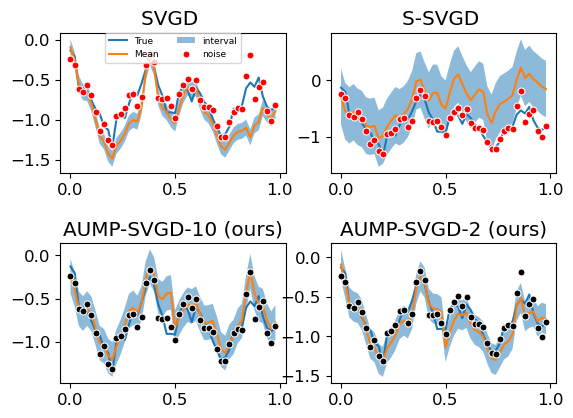

In [125]:
plt.subplot(2,2,1)
x = np.arange(0, 1, 0.02)
plt.plot(x, true_sol[1:])
plt.plot(x, sol_svgd[:,1])
plt.fill_between(x, sol_svgd[:,1]-0.1,sol_svgd[:,1]+0.1, alpha=0.5)
sns.lineplot(
          x=x,
          y=target_dist.obs.cpu().squeeze().numpy(),
          color="red",
          linestyle="",
          marker="o",
          markersize=5,
        )
plt.legend( loc="upper center", borderaxespad=0., ncol = 2,
            fontsize=6.5, labels=[ "True", "Mean", "interval", "noise"])

plt.title("SVGD ")


plt.subplot(2,2,2)
x = np.arange(0, 1, 0.02)
plt.plot(x, true_sol[1:])
plt.plot(x, sol_ssvgd[:,1])
plt.fill_between(x, sol_ssvgd[:,1]-0.5,sol_ssvgd[:,1]+0.5, alpha=0.5)
sns.lineplot(
          x=x,
          y=target_dist.obs.cpu().squeeze().numpy(),
          color="red",
          linestyle="",
          marker="o",
          markersize=5,
        )

plt.title("S-SVGD ")

plt.subplot(2,2,3)
x = np.arange(0, 1, 0.02)
plt.plot(x, true_sol[1:])
plt.plot(x, sol_AUmp_svgd_10[:,1])
plt.fill_between(x, sol_AUmp_svgd_10[:,1]-0.2,sol_AUmp_svgd_10[:,1]+0.2, alpha=0.5)
sns.lineplot(
          x=x,
          y=target_dist.obs.cpu().squeeze().numpy(),
          color="black",
          linestyle="",
          marker="o",
          markersize=5,
        )
plt.title("AUMP-SVGD-10 (ours)")

plt.subplot(2,2,4)
x = np.arange(0, 1, 0.02)
plt.plot(x, true_sol[1:])
plt.plot(x, sol_AUmp_svgd_2[:,1])
plt.fill_between(x, sol_AUmp_svgd_2[:,1]-0.19,sol_AUmp_svgd_2[:,1]+0.19, alpha=0.5)
sns.lineplot(
          x=x,
          y=target_dist.obs.cpu().squeeze().numpy(),
          color="black",
          linestyle="",
          marker="o",
          markersize=5,
        )
plt.title("AUMP-SVGD-2 (ours)")

plt.subplots_adjust(left=None, bottom=0.15, right=None, top=None, wspace=0.2, hspace=0.5)

[22.03397405 21.92406723 20.57031593 16.96850269 15.87043056 14.4221438
 13.16106426 11.16215373 10.039447    8.61784389  7.59033902  6.38749961
  3.51138267  2.97308532  2.64921234  2.26995665  2.02529441  0.81733315
  0.42859515 -0.38718609 -0.38840869 -1.30369026 -2.37551386 -1.88566396
 -0.69825969 -2.23772433 -0.42288575 -1.14339467 -0.28668562  0.06607555
 -1.49891165  0.55033063  2.00336723  2.57251976  1.8083416   3.03200403
  4.01338543  3.89569046  7.30787219  7.15837476  9.42009873  9.81264076
 10.71180385 13.52070243 14.98842556 14.83270681 18.02865464 18.14994555
 21.79230461 23.63908178]


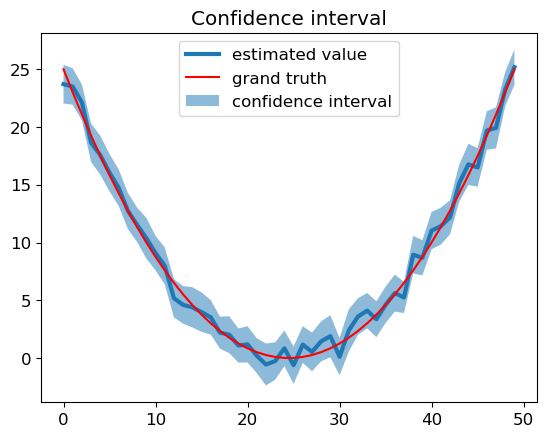

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.stats as st
matplotlib.rcParams.update({'font.size': 12})

# generate dataset
data_points = 50
sample_points = 10000
Mu = (np.linspace(-5, 5, num=data_points)) ** 2
Sigma = np.ones(data_points) * 8
data = np.random.normal(loc=Mu, scale=Sigma, size=(100, data_points))

# predicted expect and calculate confidence interval
predicted_expect = np.mean(data, 0)
low_CI_bound, high_CI_bound = st.t.interval(0.95, data_points - 1,
                                            loc=np.mean(data, 0),
                                            scale=st.sem(data))
print(low_CI_bound)
# plot confidence interval
x = np.linspace(0, data_points - 1, num=data_points)
plt.plot(predicted_expect, linewidth=3., label='estimated value')
plt.plot(Mu, color='r', label='grand truth')
plt.fill_between(x, low_CI_bound, high_CI_bound, alpha=0.5,
                label='confidence interval')
plt.legend()
plt.title('Confidence interval')
plt.show()
